Copyright **`(c)`** 2024 Federico Spinoso `<s324617@studenti.polito.it>`  
[`https://github.com/fedspi00/CI2024_lab1`](https://github.com/fedspi00/CI2024_lab1)  

# Lab 1 - Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [1]:
from itertools import accumulate
from random import random, seed
import numpy as np
from icecream import ic
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [2]:
UNIVERSE_SIZE = 100
NUM_SETS = 10
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [3]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
        
COSTS = np.pow(SETS.sum(axis=1), 1.1)


In [4]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Solution using a Hill Climber approach

We start using a solution that is similar to the ones we exploited during a lot of the exercises done in class, like 1-max or multiple knapsack. The technique used below is the vanilla version of the hill climber approach, which basically means tweaking the solution little by little and calculate the cost. If we see improvements in the cost, we consider the new solution and the new cost for the next iterations, otherwise we keep looping. Not always the solution is tweaked, only if a number less than .5 is generated at each iteration. 

## Instance 1

  0%|          | 0/1000 [00:00<?, ?it/s]

ic| current_cost: np.float64(139.7946947286104)
ic| history.index(current_cost): 0


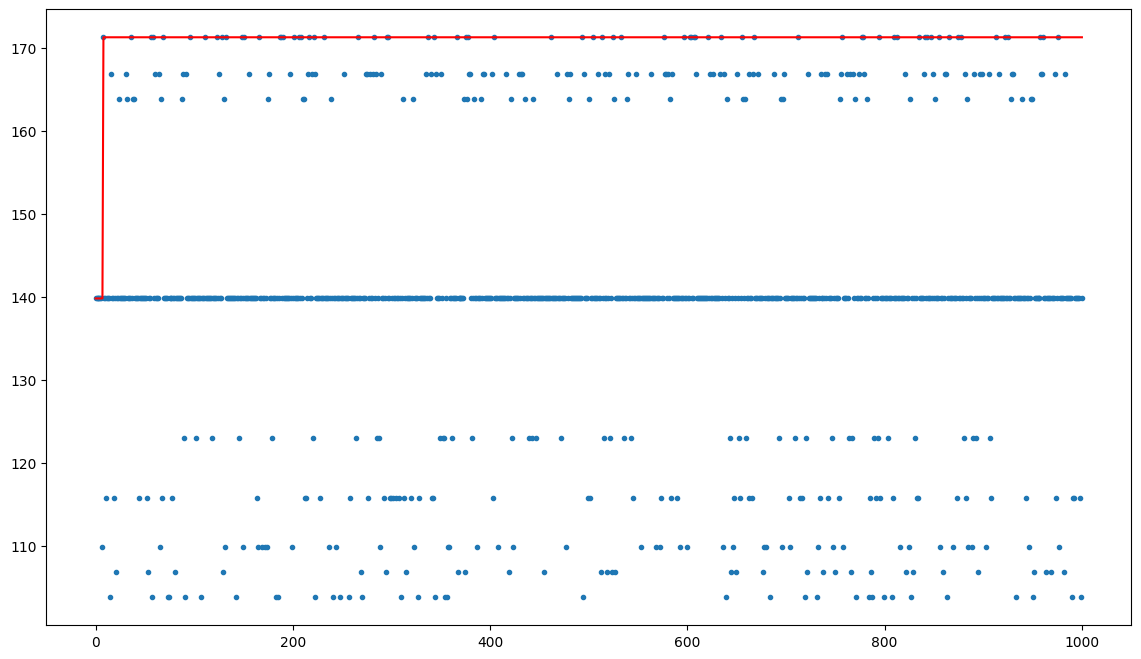

In [5]:
current_solution = rng.random(NUM_SETS) < .5
current_cost = cost(current_solution)
history = [current_cost]

for _ in tqdm(range(1_000)): 
    neighbor = current_solution.copy() 
    
    if np.random.rand() < .4:  
        i = np.random.randint(0, NUM_SETS)
        neighbor[i] = not neighbor[i]  
        
    neighbor_cost = cost(neighbor)
    history.append(neighbor_cost)
    
    if valid(neighbor) and neighbor_cost < current_cost:
        current_solution = neighbor
        current_cost = neighbor_cost

ic(current_cost)
ic(history.index(current_cost))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Instance 2

In [6]:
UNIVERSE_SIZE = 1_000
NUM_SETS = 100
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [7]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
        
COSTS = np.pow(SETS.sum(axis=1), 1.1)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| current_cost: np.float64(7240.747292243137)
ic| history.index(current_cost): 409


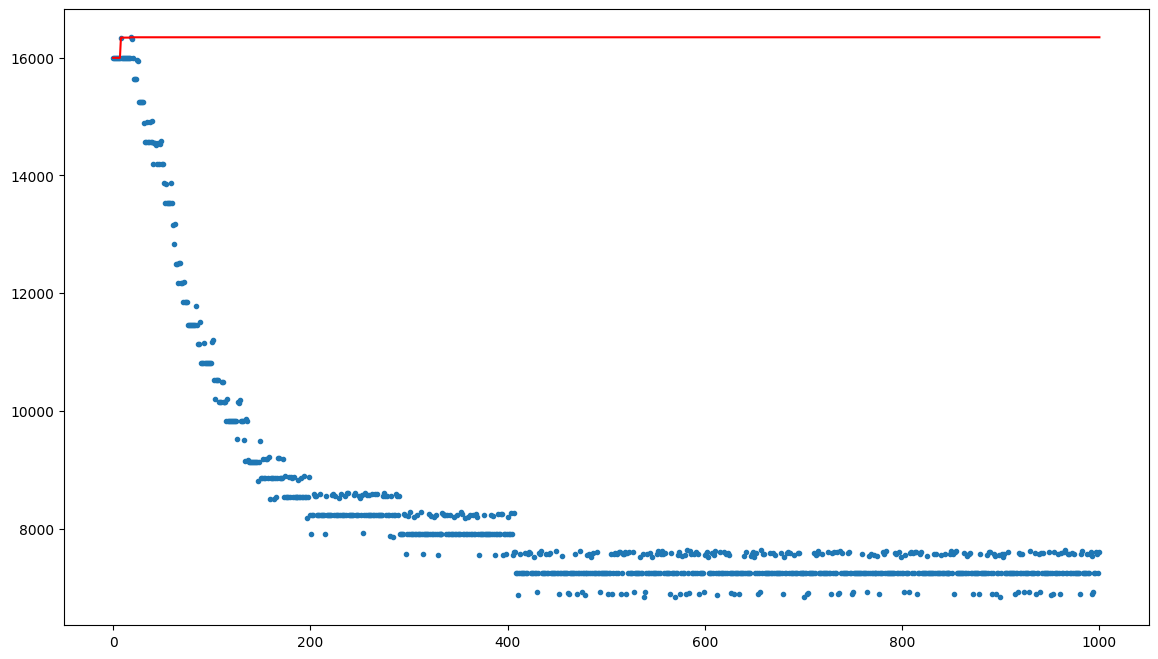

In [8]:
current_solution = rng.random(NUM_SETS) < .5
current_cost = cost(current_solution)
history = [current_cost]

for _ in tqdm(range(1_000)): 
    neighbor = current_solution.copy() 
    
    if np.random.rand() < .4:  
        i = np.random.randint(0, NUM_SETS)
        neighbor[i] = not neighbor[i]  
        
    neighbor_cost = cost(neighbor)
    history.append(neighbor_cost)
    
    if valid(neighbor) and neighbor_cost < current_cost:
        current_solution = neighbor
        current_cost = neighbor_cost

ic(current_cost)
ic(history.index(current_cost))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Instance 3

In [9]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1_000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [10]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
        
COSTS = np.pow(SETS.sum(axis=1), 1.1)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| current_cost: np.float64(1370518.7931693178)
ic| history.index(current_cost): 998


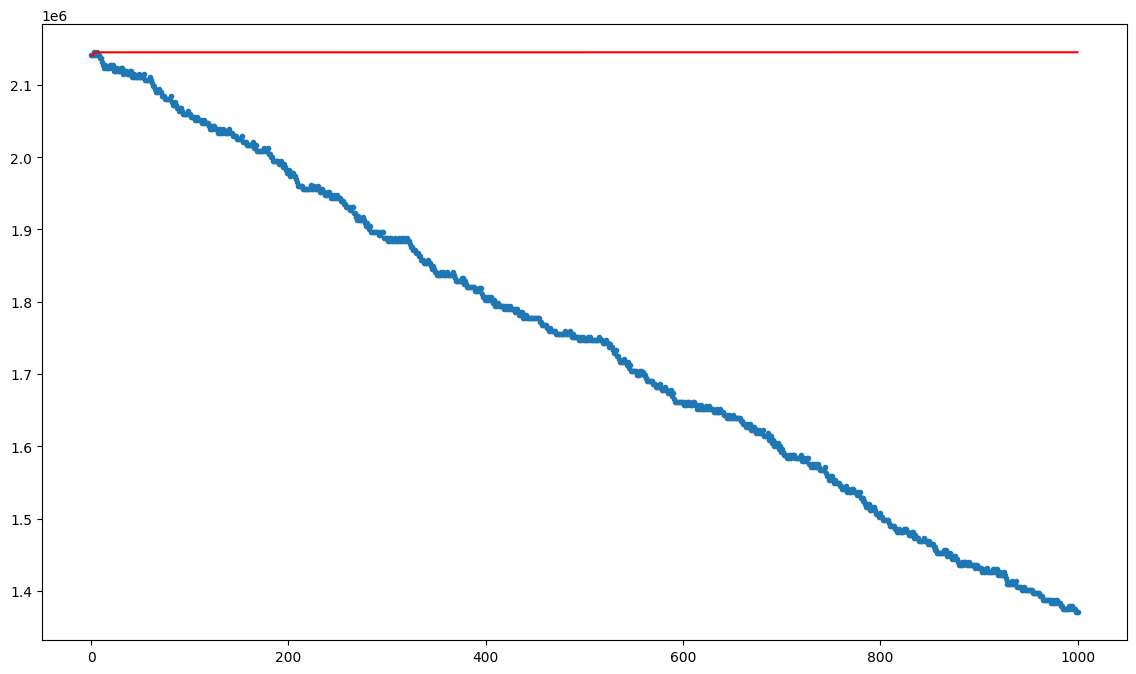

In [11]:
current_solution = rng.random(NUM_SETS) < .5
current_cost = cost(current_solution)
history = [current_cost]

for _ in tqdm(range(1_000)): 
    neighbor = current_solution.copy() 
    
    if np.random.rand() < .4:  
        i = np.random.randint(0, NUM_SETS)
        neighbor[i] = not neighbor[i]  
        
    neighbor_cost = cost(neighbor)
    history.append(neighbor_cost)
    
    if valid(neighbor) and neighbor_cost < current_cost:
        current_solution = neighbor
        current_cost = neighbor_cost

ic(current_cost)
ic(history.index(current_cost))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Instance 4

In [12]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [13]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
        
COSTS = np.pow(SETS.sum(axis=1), 1.1)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| current_cost: np.float64(119368857.8929019)
ic| history.index(current_cost): 1000


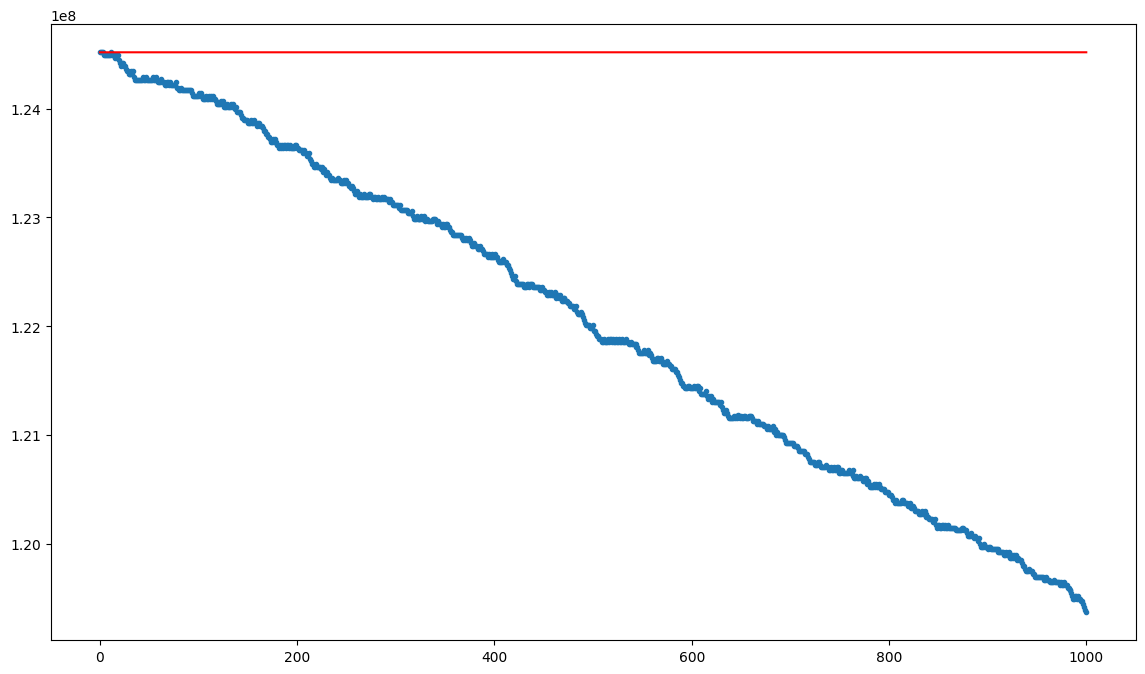

In [14]:
current_solution = rng.random(NUM_SETS) < .5
current_cost = cost(current_solution)
history = [current_cost]

for _ in tqdm(range(1_000)): 
    neighbor = current_solution.copy() 
    
    if np.random.rand() < .4:  
        i = np.random.randint(0, NUM_SETS)
        neighbor[i] = not neighbor[i]  
        
    neighbor_cost = cost(neighbor)
    history.append(neighbor_cost)
    
    if valid(neighbor) and neighbor_cost < current_cost:
        current_solution = neighbor
        current_cost = neighbor_cost

ic(current_cost)
ic(history.index(current_cost))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Instance 5

In [15]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [16]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
        
COSTS = np.pow(SETS.sum(axis=1), 1.1)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| current_cost: np.float64(258719771.18452752)
ic| history.index(current_cost): 990


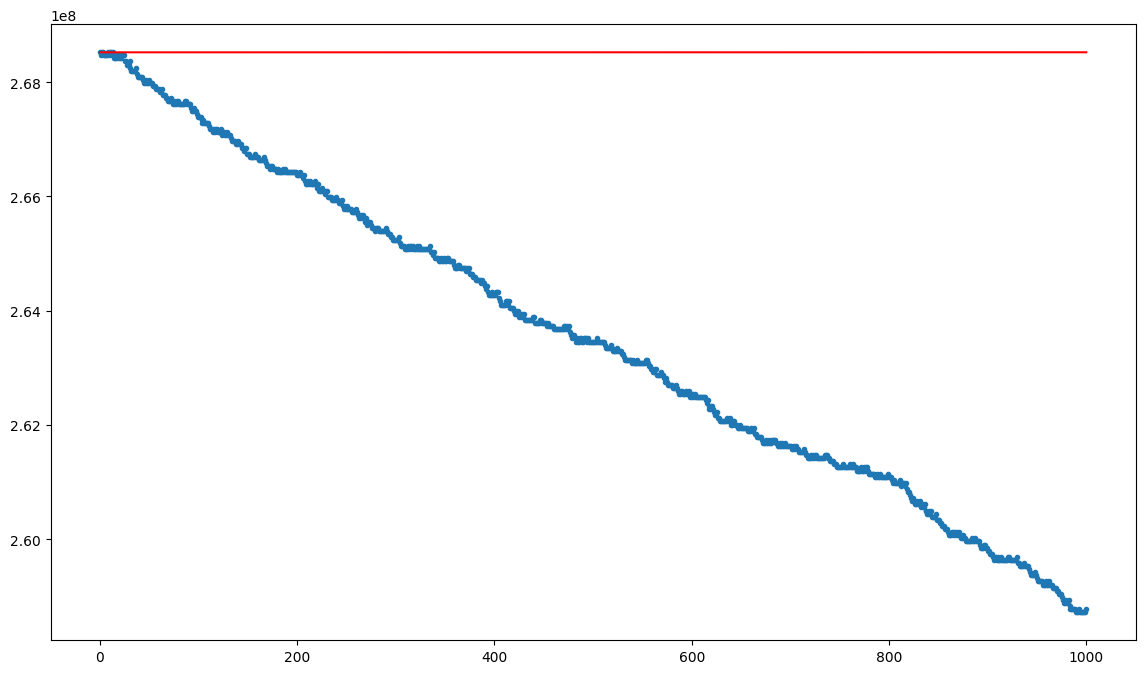

In [17]:
current_solution = rng.random(NUM_SETS) < .5
current_cost = cost(current_solution)
history = [current_cost]

for _ in tqdm(range(1_000)): 
    neighbor = current_solution.copy() 
    
    if np.random.rand() < .4:  
        i = np.random.randint(0, NUM_SETS)
        neighbor[i] = not neighbor[i]  
        
    neighbor_cost = cost(neighbor)
    history.append(neighbor_cost)
    
    if valid(neighbor) and neighbor_cost < current_cost:
        current_solution = neighbor
        current_cost = neighbor_cost

ic(current_cost)
ic(history.index(current_cost))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Instance 6

In [18]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [19]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
        
COSTS = np.pow(SETS.sum(axis=1), 1.1)


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| current_cost: np.float64(405158214.4993198)
ic| history.index(current_cost): 998


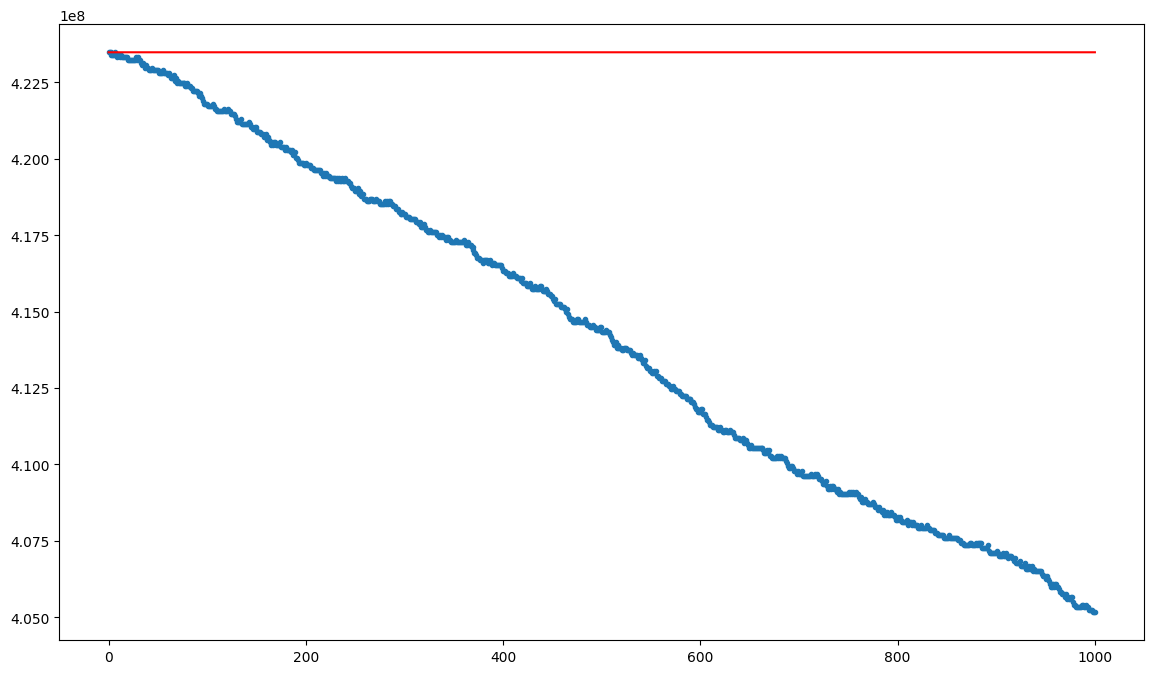

In [20]:
current_solution = rng.random(NUM_SETS) < .5
current_cost = cost(current_solution)
history = [current_cost]

for _ in tqdm(range(1_000)): 
    neighbor = current_solution.copy() 
    
    if np.random.rand() < .4:  
        i = np.random.randint(0, NUM_SETS)
        neighbor[i] = not neighbor[i]  
        
    neighbor_cost = cost(neighbor)
    history.append(neighbor_cost)
    
    if valid(neighbor) and neighbor_cost < current_cost:
        current_solution = neighbor
        current_cost = neighbor_cost

ic(current_cost)
ic(history.index(current_cost))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

## Solution using a Hill Climber approach + fitness function and single/multiple mutation

This solution is an improvement of the previous solution. Not only we created a fitness function that calculates in a tuple the quality of the solution by combining a value that indicates its validity (if it covers the whole universe) to its negative cost meaning lower cost yield higher fitness, but we also implemented two tweak functions: single mutation and multiple mutation. The first one implements one change in the solution at a time by randomly negating one value in the solution, while the second changes many at a time using the logical xor funtion between the solution and a random mask where each element has a small probability (1%) of being True.

## Instance 6

In [21]:
def fitness(solution: np.ndarray):
    return (valid(solution), -cost(solution))

def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0, NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol

  0%|          | 0/1000 [00:00<?, ?it/s]

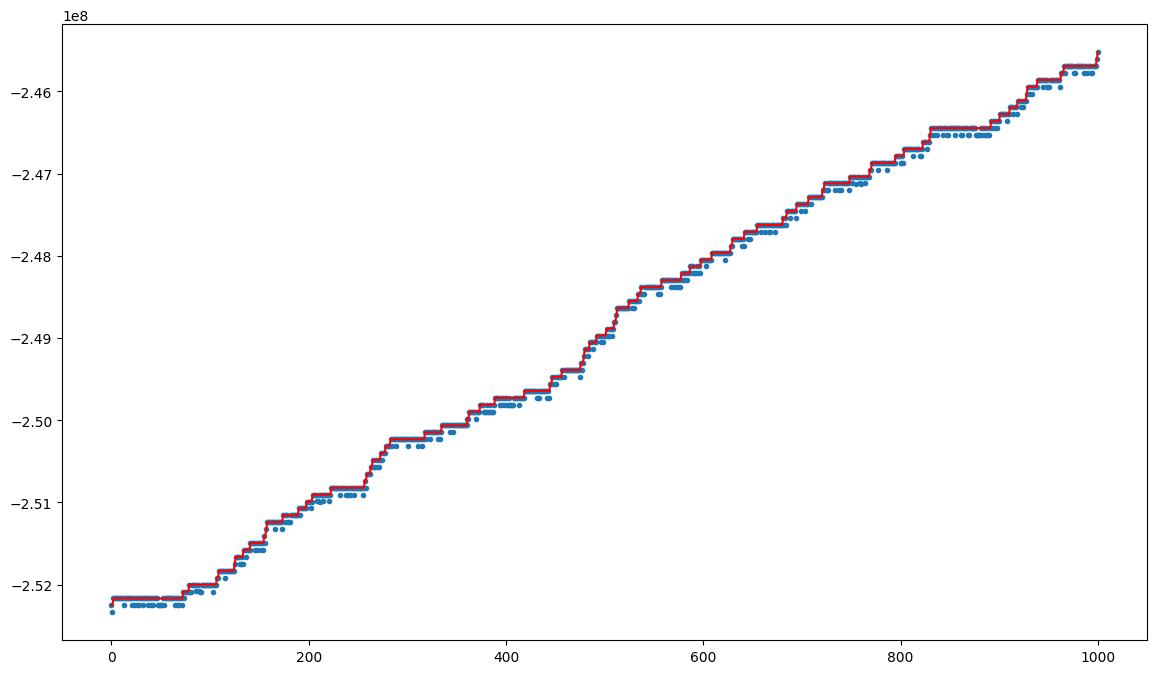

In [22]:
current_solution = rng.random(NUM_SETS) < .3
solution_fitness = fitness(current_solution)
history = [solution_fitness[1]]

tweak = single_mutation

for _ in tqdm(range(1_000)): 
    
    neighbor = current_solution 
    
    if np.random.rand() < .3:  
        neighbor = tweak(neighbor) 
    
    f = fitness(neighbor)
    history.append(f[1])
    
    if solution_fitness < f:
        current_solution = neighbor
        solution_fitness = fitness(current_solution)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")